### 2. Using the Regression on diabetes data example:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import data from sklearn
from sklearn.datasets import load_diabetes

> Attribute Information:

- age age in years

- sex

- bmi body mass index

- bp average blood pressure

- s1 tc, total serum cholesterol

- s2 ldl, low-density lipoproteins

- s3 hdl, high-density lipoproteins

- s4 tch, total cholesterol / HDL

- s5 ltg, possibly log of serum triglycerides level

- s6 glu, blood sugar level

In [2]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


#### 2.1. [5 points] 1 hr. Is age highly correlated with total cholesterol / HDL (column ‘S4’)?
  
**No, the correlation is just 0.20384089972875552, which is not highly.**

In [3]:
# correlation between age and s4
df['age'].corr(df['s4'])

0.20384089972875552

#### 2.2. [5 points] 0.5 hr. Is blood pressure highly correlated with total cholesterol / HDL (column‘S4’)?

**No, the correlation is just 0.25765005328351526, which is not highly.**

In [4]:
# corralation between bp and s4
df['bp'].corr(df['s4'])

0.25765005328351526

#### 2.3. [15 points] (4+3+3+5). 1 hr. Report Linear fit results for y = ax + b where x is the blood sugar level
    i. Linear fit coefficients and intercept of the training data
    ii. What is the R^2 for the training data?
    iii. What is the R^2 for the prediction of y based on blood sugar level for the test data?
    iv. Show a scatter plot of the train set (x, y) as blue circles and predicted (x, y) as green circles. Also show the best fit line in red.

In [5]:
# Linear fit cofficient of training data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [12]:
x = df[['s6']]
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)


In [7]:
# Linear fit coefficients and intercept of the training data
print('Linear fit coefficients: ', model.coef_[0])
print('Linear fit intercept: ', model.intercept_)

Linear fit coefficients:  605.5810117882578
Linear fit intercept:  151.7188173395385


In [8]:
# r2 of the training data
from sklearn.metrics import r2_score
print('R2 square of the training data: ', r2_score(y_train, model.predict(x_train)))
print('R2 square of the test data: ', r2_score(y_test, y_pred))

R2 square of the training data:  0.14563566152011065
R2 square of the test data:  0.1479276430064097


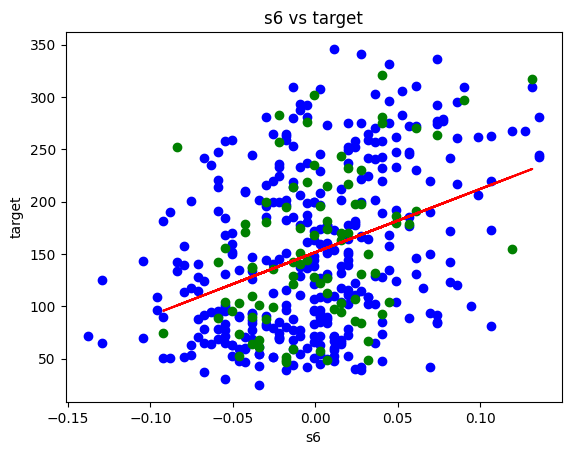

In [15]:
# best fit prediction line
plt.scatter(x_train, y_train, color='blue') # training data
plt.scatter(x_test, y_test, color='green')  # test data
plt.plot(x_test, y_pred, color='red')    # prediction line
plt.title('s6 vs target')
plt.xlabel('s6')
plt.ylabel('target')
plt.show()
